<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/icc-scorecard/blob/main/Ali_Asgar_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for <u>security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.</u> </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it?
*
 </b>

In [ ]:
import numpy as np
import pandas as pd
pd.get_option("display.max_columns")
pd.get_option("display.max_rows")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(16.7,8.27)})
plt.rcParams['figure.figsize'] = [16.7,8.27]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_directory = '/content/drive/MyDrive/Colab Notebooks/Capstone EDA/Copy of Airbnb NYC 2019.csv'
df = pd.read_csv(working_directory)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)
df=df.loc[df['price']>0]
df=df.loc[df['price']<2000]
df=df.loc[df['availability_365']>0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26100 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26100 non-null  int64  
 1   name                            26100 non-null  object 
 2   host_id                         26100 non-null  int64  
 3   host_name                       26100 non-null  object 
 4   neighbourhood_group             26100 non-null  object 
 5   neighbourhood                   26100 non-null  object 
 6   latitude                        26100 non-null  float64
 7   longitude                       26100 non-null  float64
 8   room_type                       26100 non-null  object 
 9   price                           26100 non-null  int64  
 10  minimum_nights                  26100 non-null  int64  
 11  number_of_reviews               26100 non-null  int64  
 12  last_review                     

In [ ]:
df.head(1)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365


In [ ]:
type(df.last_review[1])

str

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26100 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26100 non-null  int64  
 1   name                            26100 non-null  object 
 2   host_id                         26100 non-null  int64  
 3   host_name                       26100 non-null  object 
 4   neighbourhood_group             26100 non-null  object 
 5   neighbourhood                   26100 non-null  object 
 6   latitude                        26100 non-null  float64
 7   longitude                       26100 non-null  float64
 8   room_type                       26100 non-null  object 
 9   price                           26100 non-null  int64  
 10  minimum_nights                  26100 non-null  int64  
 11  number_of_reviews               26100 non-null  int64  
 12  last_review                     

In [ ]:
#converting date str to date time object
df['last_review']=pd.to_datetime(df['last_review'])
df['last_review_day'] = df['last_review'].dt.day
df['last_review_month'] = df['last_review'].dt.month
df['last_review_year'] = df['last_review'].dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26100 entries, 0 to 48852
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              26100 non-null  int64         
 1   name                            26100 non-null  object        
 2   host_id                         26100 non-null  int64         
 3   host_name                       26100 non-null  object        
 4   neighbourhood_group             26100 non-null  object        
 5   neighbourhood                   26100 non-null  object        
 6   latitude                        26100 non-null  float64       
 7   longitude                       26100 non-null  float64       
 8   room_type                       26100 non-null  object        
 9   price                           26100 non-null  int64         
 10  minimum_nights                  26100 non-null  int64         
 11  nu

In [ ]:
#removing the nan values from the host name 
df=df.loc[~df['host_name'].isna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26100 entries, 0 to 48852
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              26100 non-null  int64         
 1   name                            26100 non-null  object        
 2   host_id                         26100 non-null  int64         
 3   host_name                       26100 non-null  object        
 4   neighbourhood_group             26100 non-null  object        
 5   neighbourhood                   26100 non-null  object        
 6   latitude                        26100 non-null  float64       
 7   longitude                       26100 non-null  float64       
 8   room_type                       26100 non-null  object        
 9   price                           26100 non-null  int64         
 10  minimum_nights                  26100 non-null  int64         
 11  nu

In [ ]:
df['total_profit']=df['reviews_per_month']*df['price']

Text(0.5, 1.0, 'Room type and their value count')

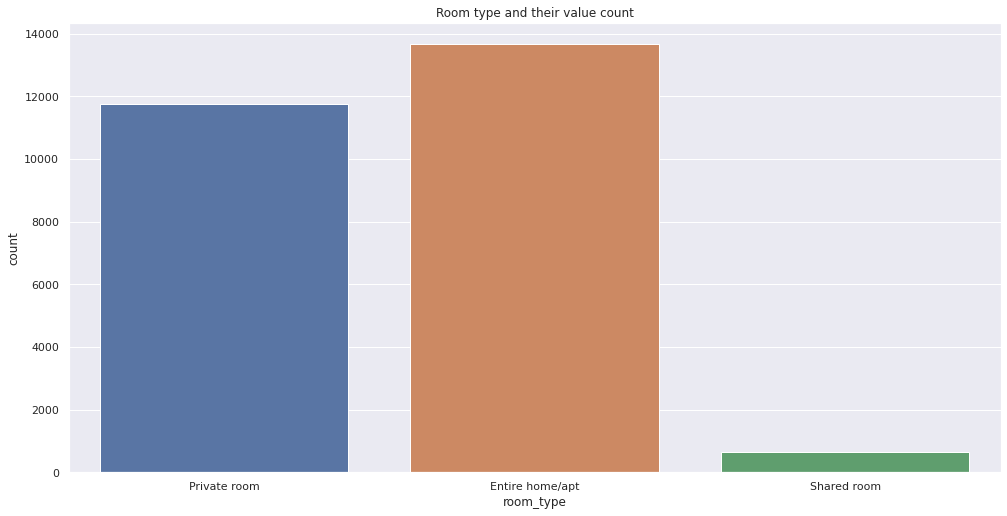

In [ ]:
sns.countplot(x=df['room_type']).set_title('Room type and their value count')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'city and thier value count')

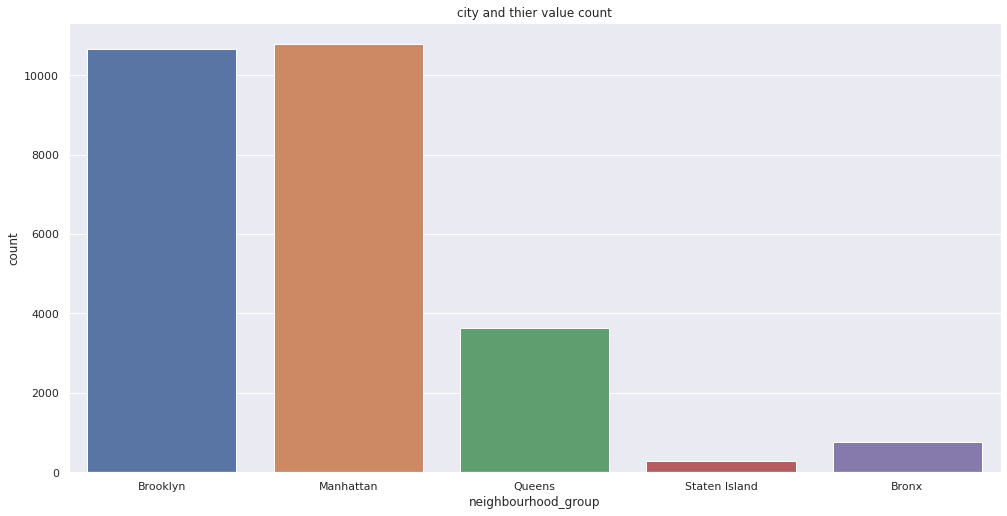

In [ ]:
sns.countplot(df.neighbourhood_group).set_title('city and thier value count')

In [ ]:
brooklyn_group_df=df.loc[df['neighbourhood_group']== 'Brooklyn']
manhattan_group_df=df.loc[df['neighbourhood_group']== 'Manhattan']

Text(0.5, 1.0, 'top 10 brooklyn neighbourhood value count')

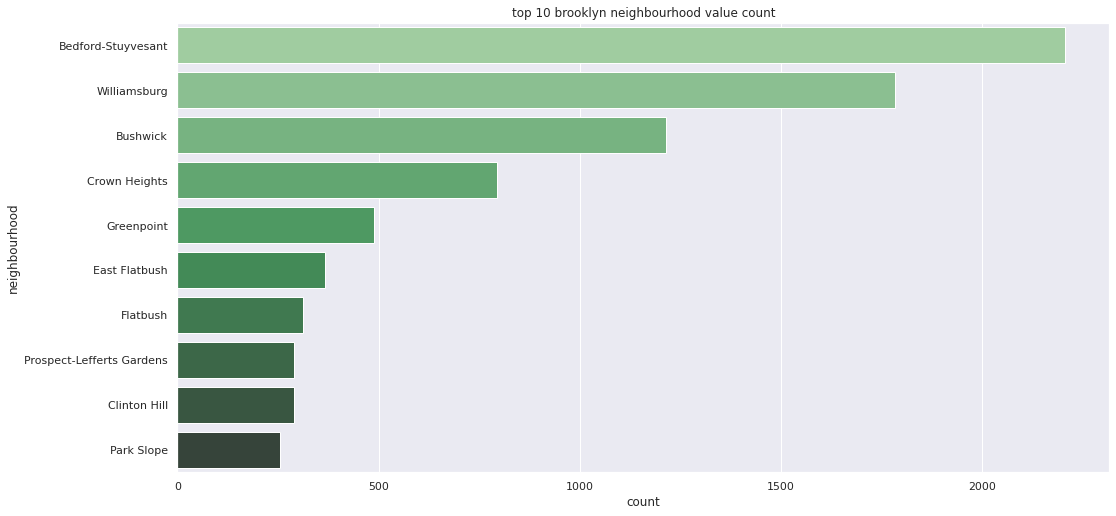

In [ ]:
# top 10 areas in brooklyn with most booking
sns.countplot(y="neighbourhood", data=brooklyn_group_df, palette="Greens_d",
              order=brooklyn_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 brooklyn neighbourhood value count')

as you can see from the above graph we can see that willamsburg, bedford and bushwick are the most famous neighbourhood in brooklyn

Text(0.5, 1.0, 'top 10 manhattan neighbourhood value count')

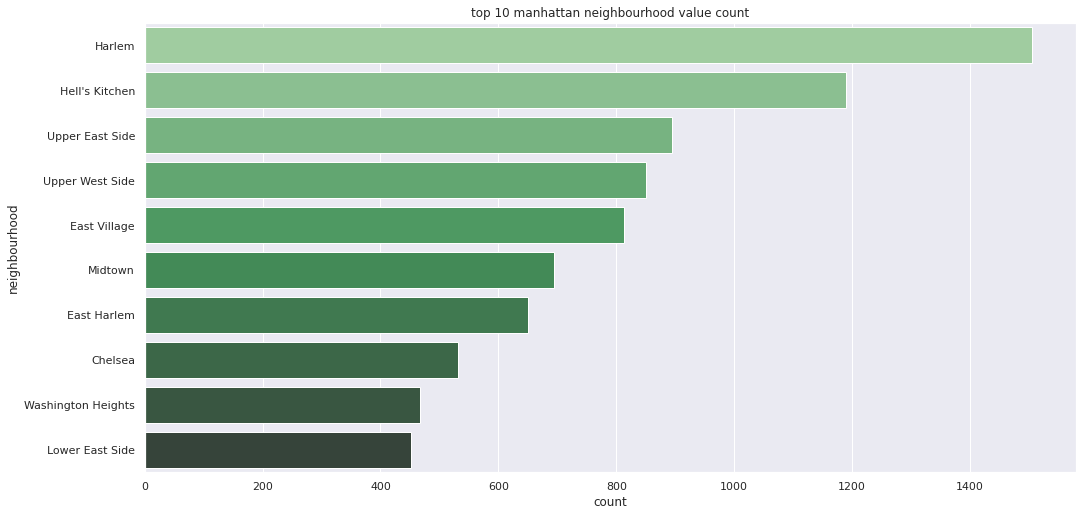

In [ ]:

sns.countplot(y="neighbourhood", data=manhattan_group_df, palette="Greens_d",
              order=manhattan_group_df.neighbourhood.value_counts().iloc[:10].index).set_title('top 10 manhattan neighbourhood value count')


as you can see from the above graph we can see that Harlem, Upper West Side and Hell's Kitchen are the most famous neighbourhood in manhattan

from the abouve graph we can conclude that the top 4 host have most of their houses in brooklyn and manhattan

Text(0.5, 1.0, 'city room type value count')

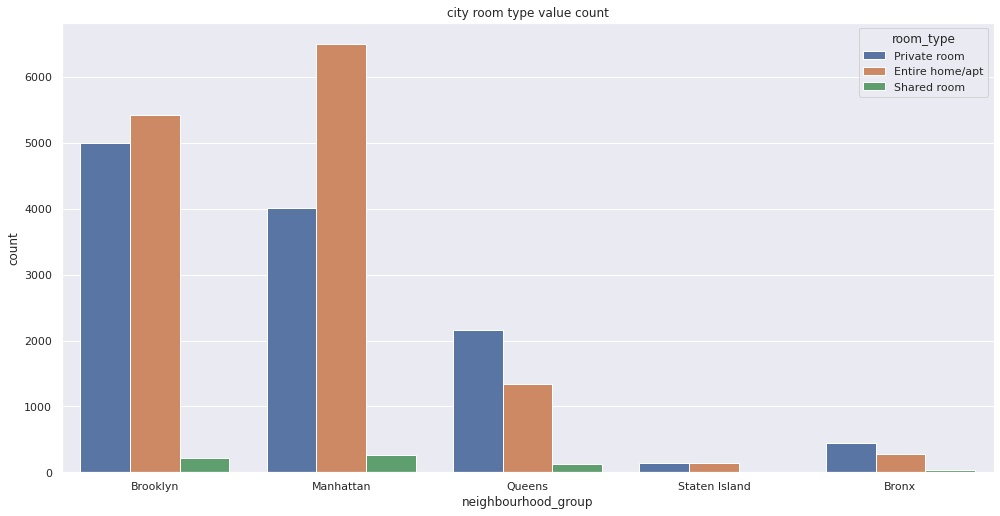

In [ ]:
sns.countplot(data=df,x='neighbourhood_group',hue='room_type').set_title('city room type value count')

this graph shows the number of hoses with their types in respective areas

by this graph we can conclude that in manhattan people prefer to book entire home rather than private room nad in brooklyn both have aprox equal no of count while people donot prefer shared room in either of the city 

In [ ]:
city_room_type_df=df.groupby(['neighbourhood_group','room_type']).agg({'price':'median'}).sort_values('price',ascending=False).reset_index()

Text(0.5, 1.0, 'median price of room type in each city')

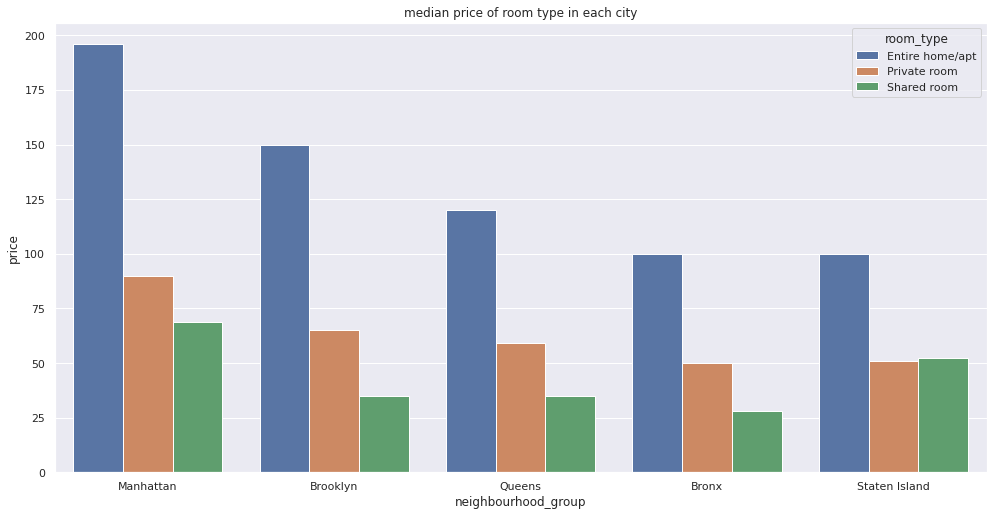

In [ ]:
sns.barplot(data=city_room_type_df,x='neighbourhood_group',hue='room_type',y='price').set_title('median price of room type in each city')

Among all the cities manhattan houses are most expensive for all the room types

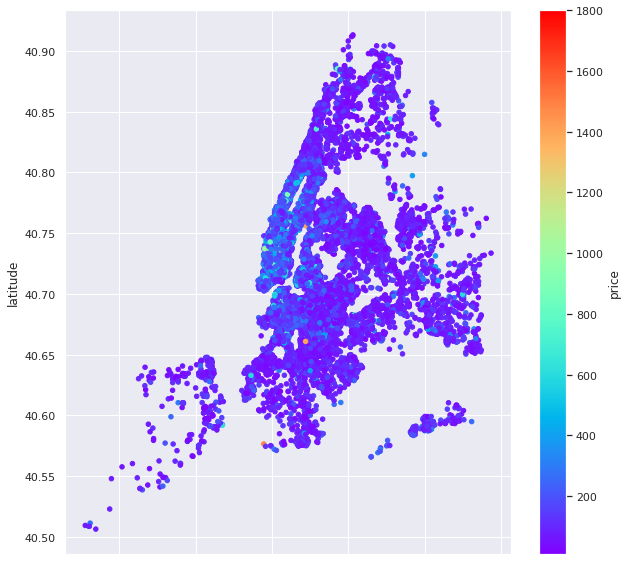

In [ ]:
data = df[["latitude","longitude","price"]]
data=data[data['price']<2000]
data.plot(kind = "scatter", x = "longitude", y = "latitude",
         figsize = (10,10), c = "price", cmap = plt.get_cmap("rainbow"),
          colorbar = True)

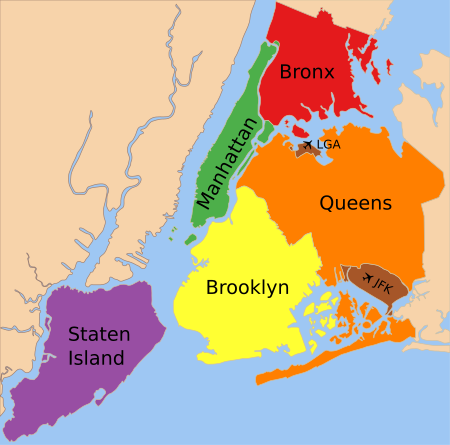

by the above scater plot we can see that manhattan has most nombers of houses which have price above 200

In [ ]:
#extracting list of top 10 most busy host by sum of reviews per month
top_10_review_host_list=df.groupby(['host_id']).agg({'reviews_per_month':'sum'}).sort_values('reviews_per_month',ascending=False).reset_index()[:10]['host_id'].tolist()
# making a df for top 10 hosts 
top_10_review_host=df[df.host_id.isin(top_10_review_host_list)]
#grouping the values by host name and taking total of reviews per month
temp_top_10_review_host=top_10_review_host.groupby('host_name').agg({'reviews_per_month':'sum'}).reset_index().rename(columns={'reviews_per_month':'total_reviews_per_month'})
#ploting a graph of host name vs total reviews per month

# sns.barplot(y="host_name", x='total_reviews_per_month' ,data=temp_top_10_review_host).set_title('top 10 host by total rewiew')


In [ ]:
# extracting list of top 10 most busy host by value count
top_10_valuecount_host_list=df['host_id'].value_counts().reset_index()[:10]['index'].tolist()
top_10_valuecount_host=df[df.host_id.isin(top_10_valuecount_host_list)]
# sns.countplot(y="host_name", data=top_10_valuecount_host).set_title('top 10 host by no of homes')

In [ ]:
top_10_profit_host_list=df.groupby('host_id').agg({'total_profit':'sum'}).reset_index().sort_values(['total_profit'],ascending=False)[:10].reset_index()['host_id'].tolist()
top_10_profit_host_df=df[df.host_id.isin(top_10_profit_host_list)]
temp_top_10_profit_host_df=top_10_profit_host_df.groupby('host_name').agg({'total_profit':'sum'}).reset_index().rename(columns={'total_profit':'total_profit_sum'})
# sns.barplot(y='host_name',x='total_profit_sum',data=temp_top_10_profit_host_df).set_title('top 10 hosts by total profit')

Text(0.5, 1.0, 'top 10 hosts by total profit')

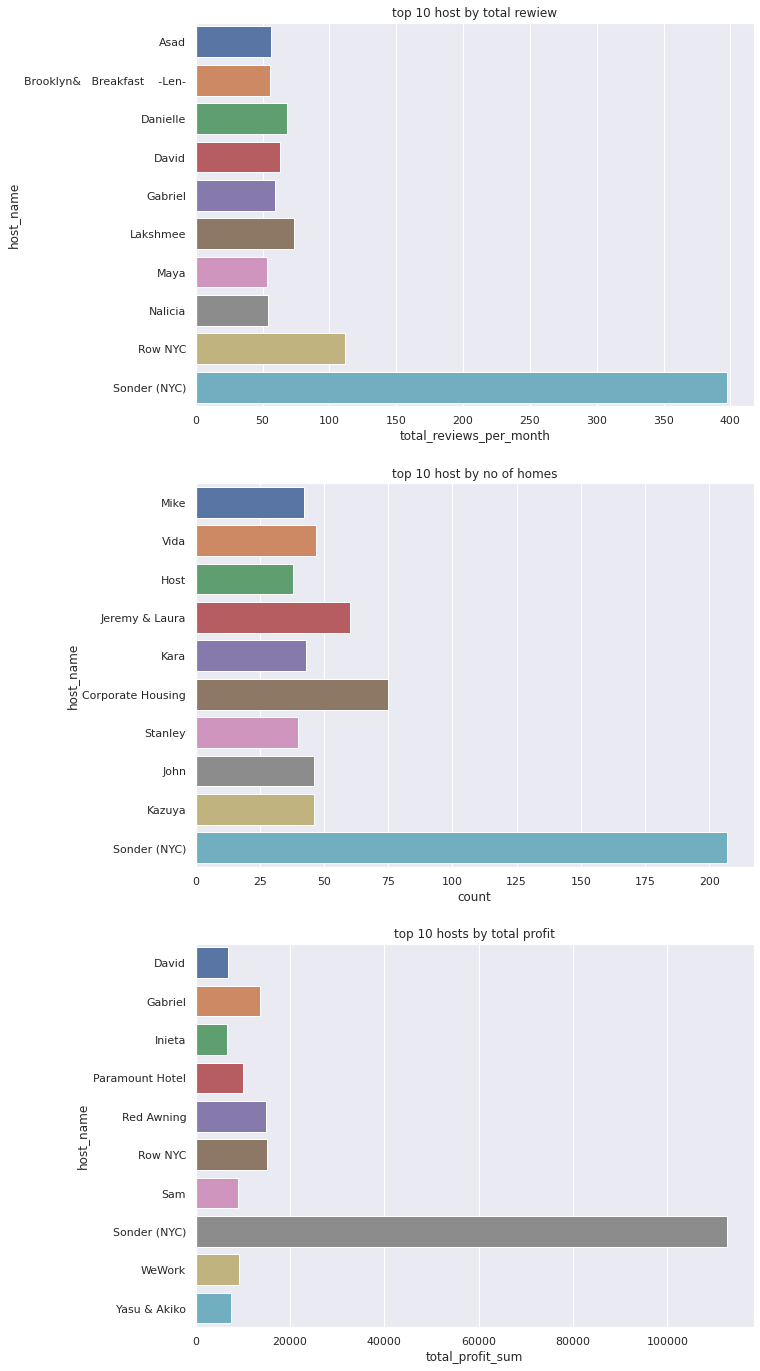

In [ ]:
fig, axes = plt.subplots(3,1, figsize=(10, 24))
sns.barplot(ax=axes[0],y="host_name", x='total_reviews_per_month' ,data=temp_top_10_review_host).set_title('top 10 host by total rewiew')
sns.countplot(ax=axes[1],y="host_name", data=top_10_valuecount_host).set_title('top 10 host by no of homes')
sns.barplot(ax=axes[2],y='host_name',x='total_profit_sum',data=temp_top_10_profit_host_df).set_title('top 10 hosts by total profit')

this graph shows the total profit of top 10 hosts based on the revies per month and price

In [ ]:
# top_10_profit_host_df   top_10_valuecount_host    top_10_review_host

Text(0.5, 1.0, 'top_10_review_host')

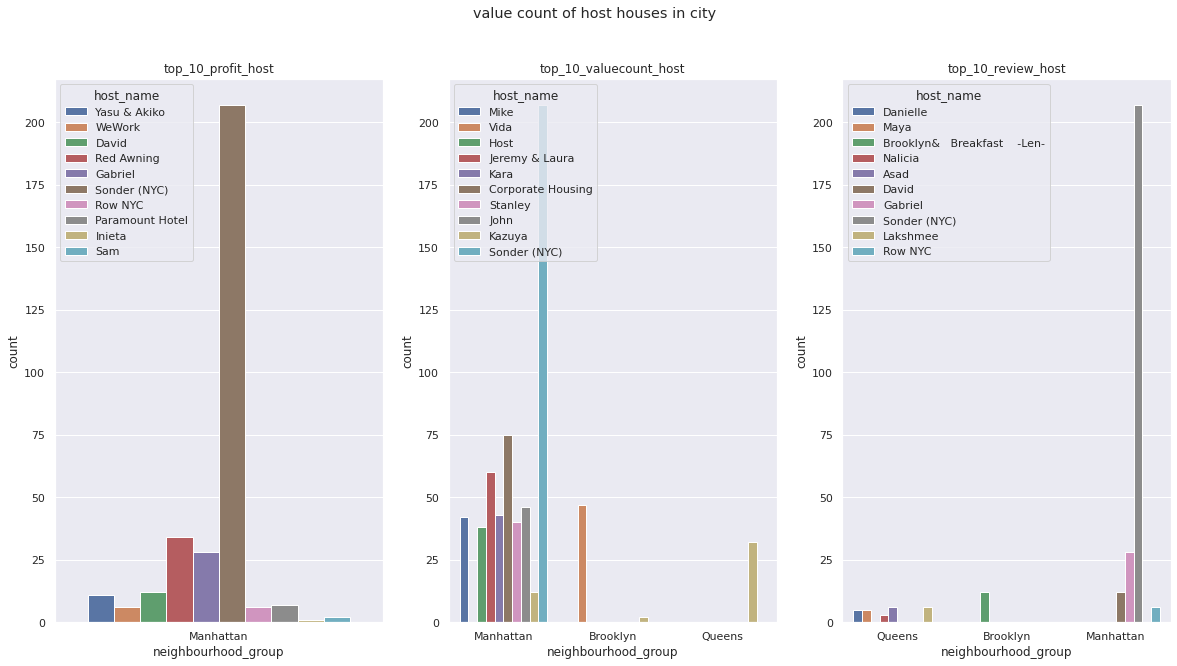

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('value count of host houses in city')
sns.countplot(ax=axes[0],data=top_10_profit_host_df,x='neighbourhood_group',hue='host_name').set_title('top_10_profit_host')
sns.countplot(ax=axes[1],data=top_10_valuecount_host,x='neighbourhood_group',hue='host_name').set_title('top_10_valuecount_host')
sns.countplot(ax=axes[2],data=top_10_review_host,x='neighbourhood_group',hue='host_name').set_title('top_10_review_host') 

Text(0.5, 1.0, 'top_10_review_host')

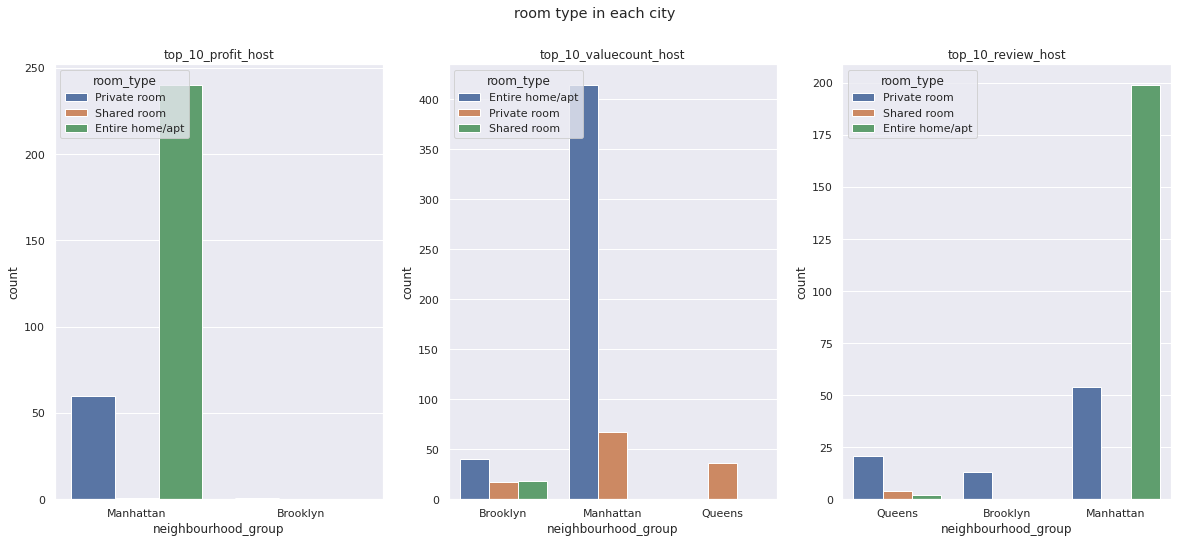

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,8))
fig.suptitle('room type in each city')
sns.countplot(ax=axes[0],data=top_10_profit_host_df_remove_outlier,x='neighbourhood_group',hue='room_type').set_title('top_10_profit_host')
sns.countplot(ax=axes[1],data=top_10_valuecount_host_remove_outlier,x='neighbourhood_group',hue='room_type').set_title('top_10_valuecount_host')
sns.countplot(ax=axes[2],data=top_10_review_host_remove_outlier,x='neighbourhood_group',hue='room_type').set_title('top_10_review_host')

this graph shows that where top 10 hosts houses are located

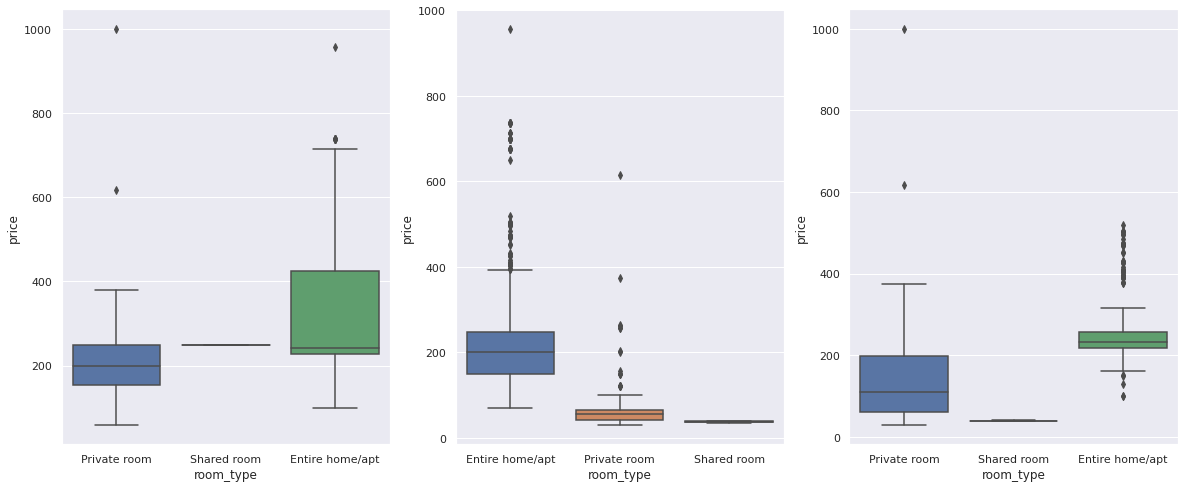

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20,8))

sns.boxplot(ax=axes[0],y='price',x='room_type',data=top_10_profit_host_df_remove_outlier)
sns.boxplot(ax=axes[1],y='price',x='room_type',data=top_10_valuecount_host_remove_outlier)
sns.boxplot(ax=axes[2],y='price',x='room_type',data=top_10_review_host_remove_outlier)

by this we can conclude that to host a house it is more advisable to host a house in manhattan with entire home /apt with an average price below 200

In [ ]:
# top 20 minimum_nights which gain max profit 
profit_min_nights=df.groupby('minimum_nights').agg({'total_profit':'sum'}).reset_index().sort_values(['total_profit'],ascending=False)[:20]

Text(0.5, 1.0, 'top 20 total profit sum vs prescribe min nights')

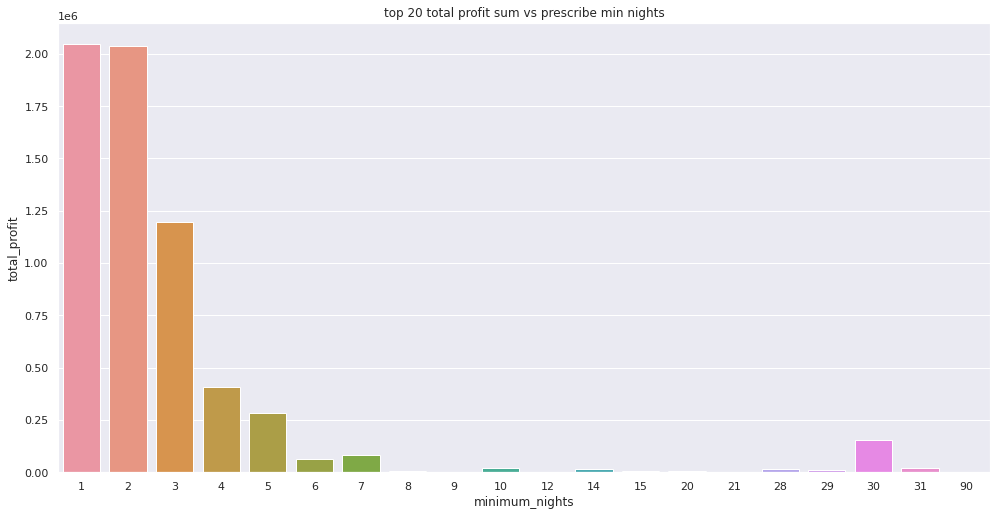

In [ ]:
sns.barplot(x='minimum_nights',y='total_profit',data=profit_min_nights).set_title('top 20 total profit sum vs prescribe min nights')

Text(0.5, 1.0, 'min nights with total profit')

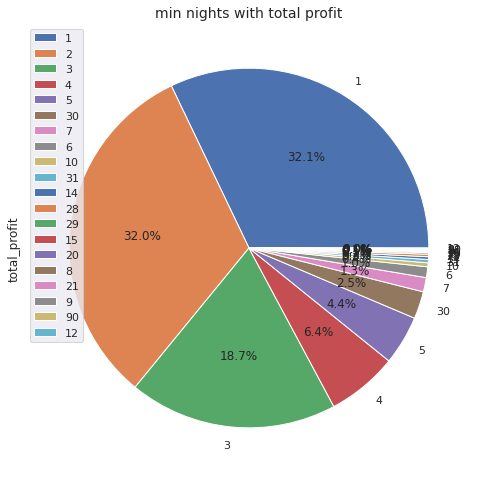

In [ ]:
#pie chart for top 20 min nights with their total profit 
profit_min_nights.plot.pie(y='total_profit',autopct="%.1f%%",labels=profit_min_nights['minimum_nights'].tolist())
plt.title("min nights with total profit", fontsize=14)

by the above graph we can conclude that the rooms with min number of days betweent 1 and 3 earn max no of profit 

In [ ]:
# top_6_hosts_min_nights=top_6_hosts.loc[top_6_hosts.minimum_nights<31]
# sns.countplot(x='host_name', data=top_6_hosts_min_nights,hue='minimum_nights').set_title('top 6 hosts and ther prescribed min nights value count')